In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = './OriginalDatasets/all_seasons_position.csv'  # Replace with your file path
basketball_data = pd.read_csv(file_path)

# Data preparation: Splitting the data based on positions
guards = basketball_data[basketball_data['POSITION'] == 'G']
forwards = basketball_data[basketball_data['POSITION'] == 'F']
centers = basketball_data[basketball_data['POSITION'] == 'C']

In [3]:
# Average heights by position
avg_heights = {
    'Guards': guards['player_height'].mean(),
    'Forwards': forwards['player_height'].mean(),
    'Centers': centers['player_height'].mean()
}
avg_heights

{'Guards': 192.24055967383248,
 'Forwards': 204.56018377946464,
 'Centers': 211.44916411378554}

The average height increases from guards to centers, which is consistent with typical basketball position characteristics.

In [4]:
# Average scoring by position
avg_scoring = {
    'Guards': guards['pts'].mean(),
    'Forwards': forwards['pts'].mean(),
    'Centers': centers['pts'].mean()
}
avg_scoring

{'Guards': 8.768291326908821,
 'Forwards': 8.204075109868159,
 'Centers': 7.073172866520788}

Surprisingly, guards have a slightly higher average scoring than forwards and centers. This might suggest that factors other than height, such as shooting skills or play style, play a significant role in scoring, especially for guards.

In [5]:
# Correlation between height and scoring for each position
corr_guards = guards[['player_height', 'pts']].corr().iloc[0,1]
corr_forwards = forwards[['player_height', 'pts']].corr().iloc[0,1]
corr_centers = centers[['player_height', 'pts']].corr().iloc[0,1]

correlations = {
    'Guards': corr_guards,
    'Forwards': corr_forwards,
    'Centers': corr_centers
}
correlations

{'Guards': 0.031242251546490938,
 'Forwards': 0.019479591237595874,
 'Centers': 0.07424120515882067}

Across all positions, the correlation between height and scoring appears to be weak. This indicates that while height is a distinguishing physical attribute in basketball, it is not a sole or primary determinant of a player's scoring ability.

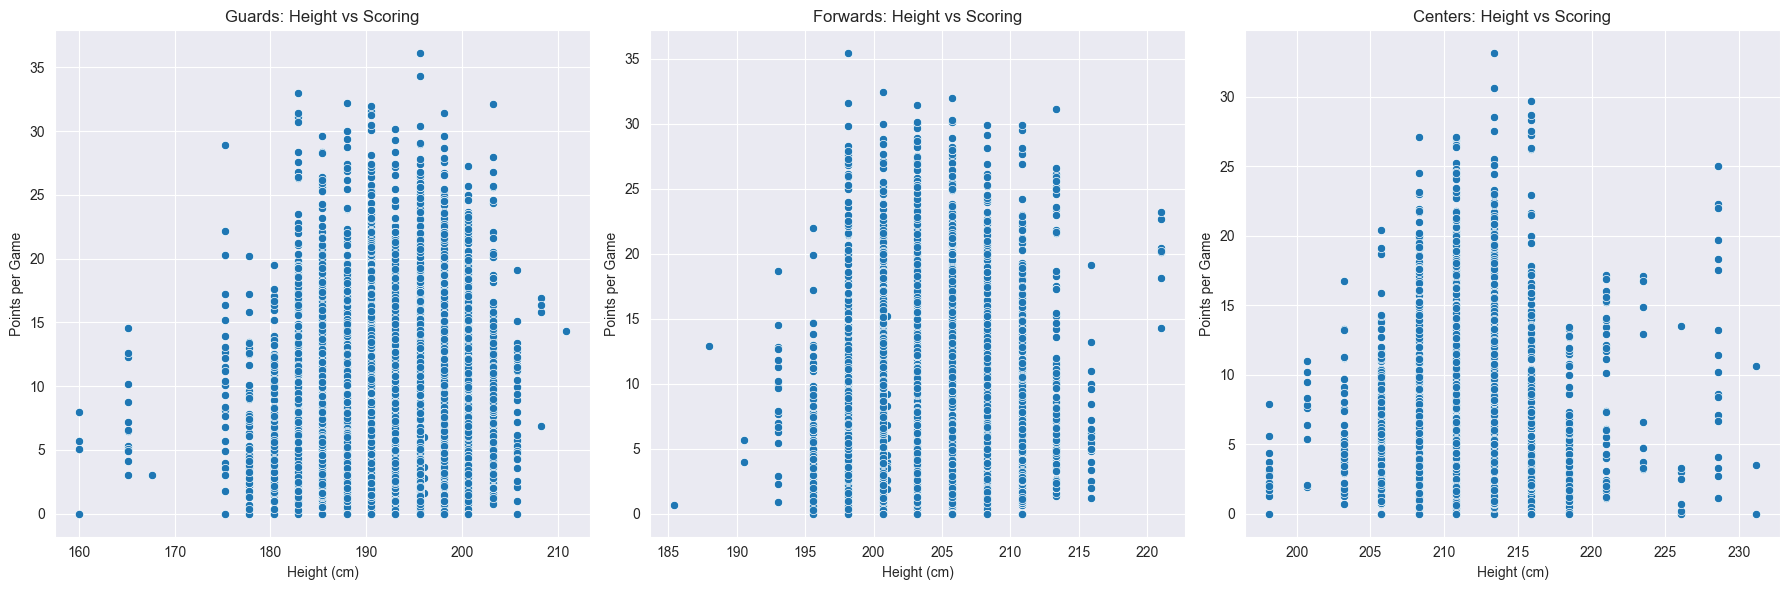

In [6]:
# Visualization: Scatter plots for height vs. scoring by position
plt.figure(figsize=(18, 6))

# Scatter plots for each position
for i, position in enumerate(['Guards', 'Forwards', 'Centers']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=basketball_data[basketball_data['POSITION'] == position[0]]['player_height'],
                    y=basketball_data[basketball_data['POSITION'] == position[0]]['pts'])
    plt.title(f"{position}: Height vs Scoring")
    plt.xlabel("Height (cm)")
    plt.ylabel("Points per Game")

plt.tight_layout()
plt.show()